| 矩阵大小         | Baseline/ms | AVX/ms   | AVX_Block/ms |
| ---------------- | ----------- | -------- | ------------ |
| 8$\times$8       | 1.417523    | 1.294703 | -0.138112     |
| 16$\times$16       | 1.895140    | 1.787179 | 0.217173     |
| 32$\times$32       | 2.625133    | 1.515476 | 0.602975     |
| 64$\times$64       | 3.102039    | 1.225323 | 1.698647     |
| 128$\times$128       | 3.764442    | 2.038140 | 1.845815     |
| 256$\times$256       | 4.703267    | 3.332929 | 2.546455     |
| 512$\times$512       | 5.577926    | 3.242605 | 3.441954     |
| 1024$\times$1024       | 6.909607    | 4.037274 | 4.508480     |
| 2048$\times$2048       | 8.124131    | 5.227189 | 5.564798     |
| 4096$\times$4096       | 9.517025    | 5.988625 | 6.474343     |


[Text(0, 0, '8'),
 Text(1, 0, '16'),
 Text(2, 0, '32'),
 Text(3, 0, '64'),
 Text(4, 0, '128'),
 Text(5, 0, '256'),
 Text(6, 0, '512'),
 Text(7, 0, '1024'),
 Text(8, 0, '2048'),
 Text(9, 0, '4096')]

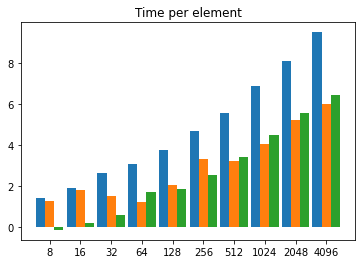

In [13]:
# | 矩阵大小         | Baseline/ms | AVX/ms   | AVX_Block/ms |
# | ---------------- | ----------- | -------- | ------------ |
# | 8$\times$8       | 0.000597    | 0.000528 | 0.000126     |
# | 16$\times$16     | 0.00385     | 0.003456 | 0.000719     |
# | 32$\times$32     | 0.031956    | 0.010535 | 0.00423      |
# | 64$\times$64     | 0.205935    | 0.031527 | 0.050611     |
# | 128$\times$128   | 1.5976      | 0.284279 | 0.234541     |
# | 256$\times$256   | 16.3401     | 4.15073  | 1.89044      |
# | 512$\times$512   | 156.738     | 15.169   | 18.5154      |
# | 1024$\times$1024 | 2374.52     | 134.319  | 215.169      |
# | 2048$\times$2048 | 31996.1     | 1765.92  | 2475.1       |
# | 4096$\times$4096 | 515327      | 15125.8  | 24584.6      |

# 求每个元素的用时并画柱状图
import matplotlib.pyplot as plt
import numpy as np

baseline = np.array([0.000597, 0.00385, 0.031956, 0.205935, 1.5976, 16.3401, 156.738, 2374.52, 31996.1, 515327])
avx = np.array([0.000528, 0.003456, 0.010535, 0.031527, 0.284279, 4.15073, 15.169, 134.319, 1765.92, 15125.8])
avx_block = np.array([0.000126, 0.000719, 0.00423, 0.050611, 0.234541, 1.89044, 18.5154, 215.169, 2475.1, 24584.6])
N = np.array([8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

for i in range(10):
    baseline[i] /= (2 ** (2*(i+3)))
    baseline[i] = np.log(baseline[i]) + 13
    avx[i] /= (2 ** (2*(i+3)))
    avx[i] = np.log(avx[i]) + 13
    avx_block[i] /= (2 ** (2*(i+3)))
    avx_block[i] = np.log(avx_block[i]) + 13

# 按照上面表格的形式输出 将|号对齐
print('| 矩阵大小         | Baseline/ms | AVX/ms   | AVX_Block/ms |')
print('| ---------------- | ----------- | -------- | ------------ |')
for i in range(10):
    print('| %d$\\times$%d       | %.6f    | %.6f | %.6f     |' % (N[i], N[i], baseline[i], avx[i], avx_block[i]))

x = np.arange(10)
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, baseline, width, label='Baseline')
rects2 = ax.bar(x, avx, width, label='AVX')
rects3 = ax.bar(x + width, avx_block, width, label='AVX_Block')

ax.set_title('Time per element')
ax.set_xticks(x)
ax.set_xticklabels(N)
